In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd

# <font color = 'red'> Lection 2. Differentiation of multivariable functions. Linear regression with an arbitrary basis. </font>

## <font color = 'green'> 1. Differentiation of a function with a vector argument. Basics.  </font>

Let us recall the concept of differentiation.

To begin with, let $f$ be a one-argument function that returns one argument. In other words, $f:\mathbb{R} \rightarrow \mathbb{R}$.

$f$ is said to be **differentiable** at the point $x_{0}$ if there is a finite limit: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

It is called the derivative of the function at the point $x_{0}$.  This same information can be written in differential form: $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0 }}](h) + o(h)$$. The quantity $f'(x_{0}) h = [Df_{x_{0}}](h)$ is called the **function differential**.


Now let's assume that the function $f$ works a little differently. Now it takes a vector argument as input, and returns the still scalar $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Now the concept of differential is introduced somewhat differently. We can also write: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Or in a more condensed form: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f) \cdot\overline{h} + o(||\overline{h}||) $$

In this case, the derivative is understood as a **vector** (more often it is written in the form of a column vector) of the gradient $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

In ML we are forced to work with optimization problems of just such functions, which immediately refers us to derivatives. In particular, using lecture notes, you can easily obtain two simple formulas for matrix differentiation.

1. If the function $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, then $f'(\overline{x}) = \overline{a} $ . Where $\overline{x},\overline{a} $ is a vector of columns.

2. If the function $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, then $f'(\overline{x}) = (A+A^{T })\overline{x} $. Where $\overline{x}$ is a column vector, $A$ is a square matrix of the appropriate size.


In the future, perhaps we will add to the list. In the meantime, you can practice [on your own](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Now let's check the validity of formula 2.

In [2]:
A = np.random.randint(10,size =(10,10))
A

array([[5, 3, 6, 9, 7, 0, 7, 2, 1, 4],
       [7, 0, 2, 2, 3, 8, 9, 8, 6, 2],
       [6, 5, 9, 5, 8, 5, 2, 6, 6, 7],
       [1, 6, 0, 8, 6, 3, 3, 4, 3, 2],
       [7, 0, 5, 5, 4, 3, 4, 1, 0, 6],
       [3, 8, 2, 1, 0, 2, 2, 3, 8, 4],
       [6, 7, 5, 5, 8, 1, 5, 1, 3, 0],
       [7, 5, 6, 0, 1, 0, 1, 6, 8, 2],
       [8, 6, 5, 6, 4, 6, 9, 6, 3, 6],
       [1, 9, 2, 0, 3, 5, 1, 1, 8, 7]])

In [3]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) 

In [4]:
x0 = np.arange(0,10) 
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
grad = nd.Gradient(func)(x0) 
grad

array([393., 512., 440., 296., 308., 306., 296., 307., 491., 381.])

In [6]:
np.dot(A + A.T,x0) 

array([393, 512, 440, 296, 308, 306, 296, 307, 491, 381])

<font color = 'red' size = 5>Task 1 </font>

1. Study in detail the formulas obtained above. Practice deriving them yourself.
2. Get any 2 more formulas for similar matrix or vector differentiation. Briefly summarize the derivation of the formulas in the document.
3. Check the validity of your formulas using the built-in functions of the numdifftools package.

## <font color = 'green'> 2. Linear regression on an arbitrary basis. </font>

Let a set of pairs of features and labels $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$ be given. It is important to understand that now each element of the set of features is a vector consisting of some number $k$ of features $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

The task is to obtain a function that allows predicting a continuous label by $y$ from a set of features $X$. Such a task is called multiple regression.

To solve this problem, you can use the multiple regression formula:$$f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $$.

A special case of such regression can be considered trivial linear regression, when $\phi_{i}(\overline{X}) = x_{i}$. Then, adding a dummy function $\phi_{0}(\overline{x}) = 1$, we get the formula of **classical linear regression**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{j} x_{j} $$

Here $m = k + 1 $

Note that the formula of paired regression $f(x) = a x +b $ is also a special case of the above.

It is also worth noting that *the number of basic functions can be either smaller or larger than the number of original features*.

Now let's proceed to **training the obtained model** $f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $. It comes down to finding the weights $w_{1},...,w_{m}$ based on the original training data.

Similarly to pair regression, we compose the loss function and minimize it: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{X_{i}}))^2 \rightarrow min$$.

Of course, it is easier to write this formula in matrix form (get it yourself): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}), $$
where $Q$ is an *information matrix*, which is defined as follows: $$Q=\begin{bmatrix}
\phi_{1}(\overline{x_{1}}) & \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
\phi_{1}(\overline{x_{2}}) & \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}}) \\
...\\
\phi_{1}(\overline{x_{n}}) & \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}})
\end{bmatrix}, $$

$\overline{w}$ is a column vector of weights: $$ \overline{w} = \begin{bmatrix}
w_{1}\\
w_{2}\\
...\\
w_{m}
\end{bmatrix},
$$

$\overline{y}$ is a column vector of known target labels: $$ \overline{y} = \begin{bmatrix}
y_{1}\\
y_{2}\\
...\\
y_{n}
\end{bmatrix}.
$$

Next, we solve the optimization problem. Let's find the derivative of the obtained scalar vector function and equate it to 0, based on the knowledge from point 1. $$ \frac { \partial \mathcal {L}} { \partial w} = \nabla \mathcal {L} = \nabla \mathcal {L} ( ( \overline {y} - Q \cdot \overline {w} ) ( \overline {y} - Q \cdot \overline {w} ) ^ { T} ) = \nabla \mathcal {L} ( \overline {y} ^ { T} \overline {y} - 2 \overline {y} ^ { T} Q \overline {w} + \overline {w} ^ { T} Q ^ { T} Q \overline {w} ) = 0 $$

Next, we apply the formulas from point 1. $$ \nabla \mathcal {L} ( \overline {y} ^ { T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

From which we immediately obtain the final formula for the weight vector: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.

The resulting formula has some limitations (think about them). You should also think about the choice of basis functions. To obtain an *information matrix*, the original data requires some transformation depending on the choice of basis functions.

<font color = 'orange' size = 3>Example 1 </font>

Для начала используем встроенные возможности.

In [7]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

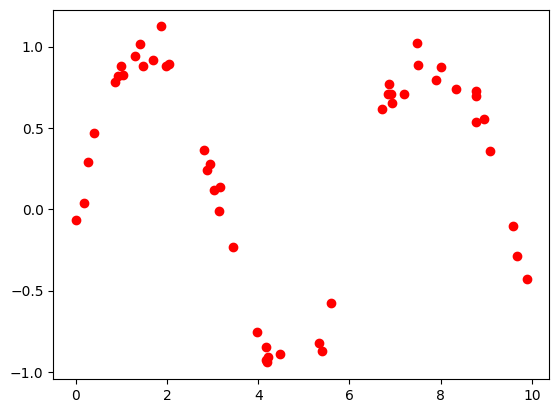

In [8]:
plt.scatter(x, y, c ='red')

In [9]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [11]:
model.fit(X, y)

LinearRegression()

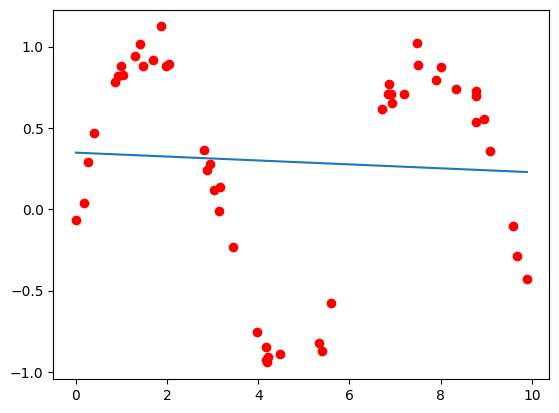

In [12]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [13]:
model.score(X,y)

0.003269744706462907

In [14]:
(model.coef_,model.intercept_)

(array([-0.01203828]), 0.34794576296220453)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)

Now let's add another basis. It is clear that the function is similar to a power function. Let's use a polynomial basis.
The [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class allows you to transform your data and go from the standard basis ${x_1,x_2,...x_n}$ to a polynomial basis, which consists of all possible functions $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [16]:
X_new = poly_reg.fit_transform(X)

In [17]:
X_new #вместо одного x теперь целый вектор фич степени от 0 до 4

array([[1.00000000e+00, 4.17022005e+00, 1.73907352e+01, 7.25231927e+01,
        3.02437672e+02, 1.26123164e+03],
       [1.00000000e+00, 7.20324493e+00, 5.18867376e+01, 3.73752880e+02,
        2.69223354e+03, 1.93928176e+04],
       [1.00000000e+00, 1.14374817e-03, 1.30815988e-06, 1.49620548e-09,
        1.71128228e-12, 1.95727599e-15],
       [1.00000000e+00, 3.02332573e+00, 9.14049845e+00, 2.76347041e+01,
        8.35487119e+01, 2.52594970e+02],
       [1.00000000e+00, 1.46755891e+00, 2.15372915e+00, 3.16072440e+00,
        4.63854925e+00, 6.80734427e+00],
       [1.00000000e+00, 9.23385948e-01, 8.52641608e-01, 7.87317280e-01,
        7.26997712e-01, 6.71299472e-01],
       [1.00000000e+00, 1.86260211e+00, 3.46928663e+00, 6.46190062e+00,
        1.20359498e+01, 2.24181854e+01],
       [1.00000000e+00, 3.45560727e+00, 1.19412216e+01, 4.12641722e+01,
        1.42592773e+02, 4.92744625e+02],
       [1.00000000e+00, 3.96767474e+00, 1.57424429e+01, 6.24608929e+01,
        2.47824507e+02, 

In [18]:
np.linalg.det(np.dot(X_new.T,X_new))

1.256582377785698e+23

In [19]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [20]:
model.fit(X_new, y)

LinearRegression(fit_intercept=False)

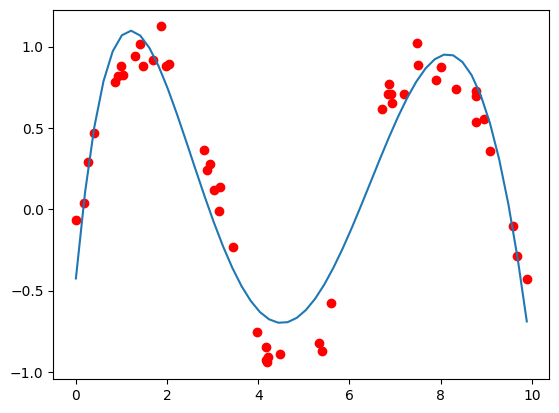

In [21]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))


In [22]:
model.score(X_new,y)

0.9000967365251441

In [23]:
(model.coef_,model.intercept_) 

(array([-4.29172231e-01,  2.99701508e+00, -1.85787301e+00,  3.87565222e-01,
        -3.17737847e-02,  8.54885479e-04]),
 0.0)

<font color = 'orange' size = 3>Example 2 </font>

Now let's take multidimensional features. We'll use the fish dataset from the Fish.csv file and try to create a regression model to predict the weight (weight column).

Let's try using the standard formula for classical regression $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.

In [24]:
dataframe=pd.read_csv("Fish.csv") 
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
X = dataframe.drop(["Species","Weight"],axis=1).values 

In [26]:
X

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [27]:
y = dataframe["Weight"].values 

In [28]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [29]:
model = LinearRegression(fit_intercept=True) 
model

LinearRegression()

In [30]:
model.fit(X, y)

LinearRegression()

In [31]:
model.score(X,y)

0.8852867046546207

In [32]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.58695535694164)

<font color = 'red' size = 5>Task 2 </font>

1. Study the examples described above in detail.
2. Implement functions for regression on an arbitrary basis yourself (use only basic functions and numpy), using the formulas obtained above. Use matrix calculations!
3. Practice both your and the built-in models on different artificial data.
4. Build models (built-in and yours) to predict the weight of fish from the Fish.csv file. Try different bases, different combinations of features and try to improve the accuracy of the forecast.
5. Try to predict the [Perfomance index](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) of students and the [House price (Med house val)](https://www.kaggle.com/datasets/shibumohapatra/house-price/data) using your own and built-in models with different bases.
6. Consider how using too many basic features will affect the model.
7. In the example above, we test the resulting model on the same data that we train. In general, this is not very good. Split the original data into training and test sets and repeat the accuracy calculations.
8. Try increasing the complexity of the model on test or real data. For example, by adding features of higher and higher degrees. How does this affect the accuracy on training and test data?

Hint! To assess the quality of the model, if the drawing is not possible, use the [coefficient of determination](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} - f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

where $\overline{y}$ is the column of training labels, $f(\overline{x})$ is the prediction function applied to the column vector of the original features.

to be continued... 🧡